In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading CSV file 
url = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(url)

In [3]:
# Printing first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# DATA CLEANING STEPS

## 1. Drop Duplicates

In [4]:
# Dropping duplicate rows
df = df.drop_duplicates()
print(df.shape)

(96146, 9)


## 2. Encoding

In [5]:
# Converting categorical labels into a numerical format.
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

## 3. Handling Data Type

In [6]:
#Handling outliers for age column
df = df[df['age'] == df['age'].astype(int)]
print(df.shape)

(94133, 9)


## 4. Handling Outliers

In [7]:
# Handling outliers for BMI
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df[(df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)]

# print(f"Number of outliers: {outliers.shape[0]}")
# outliers


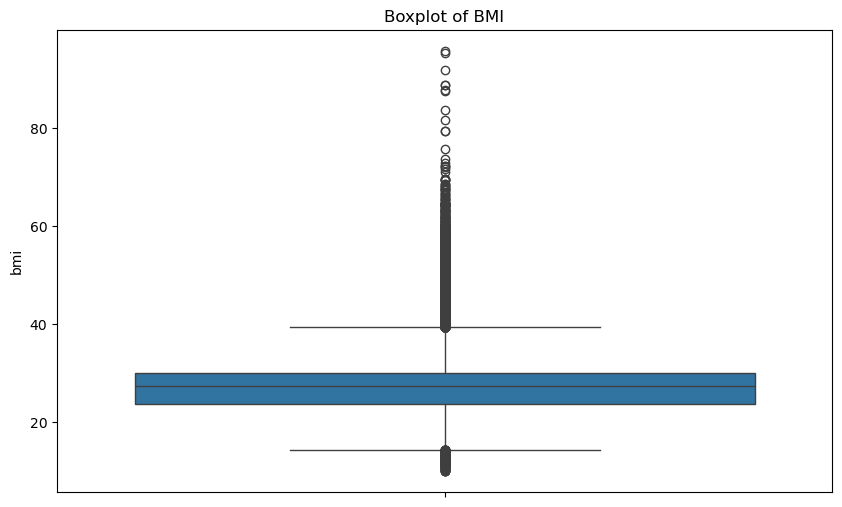

In [8]:
#visualizing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['bmi'])
plt.title('Boxplot of BMI')
plt.show()


In [9]:
# Clipping the values in the 'bmi' column to fall within the specified lower and upper limits.
df['bmi'] = df['bmi'].clip(lower_limit, upper_limit)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


## 5.Filter out columns

In [10]:
# Filter out rows with invalid biological values
df = df[(df['age'] > 1) & (df['bmi'] > 10) & (df['blood_glucose_level'] >= 80)]

## 6. Checking for Inconsistent Data in Categorical Column

In [11]:
# Capitalize the first letter of each string in the 'smoking_history' column.
df['smoking_history'] = df['smoking_history'].str.capitalize()

## 7. Handling missing values

In [12]:
# Replace 'no info' with the mode of the column
mode_value = df['smoking_history'].mode()[0]
df['smoking_history'] = df['smoking_history'].replace('No info', mode_value)
df['smoking_history']

0          Never
1          Never
2          Never
3        Current
4        Current
          ...   
99994      Never
99996      Never
99997     Former
99998      Never
99999    Current
Name: smoking_history, Length: 94050, dtype: object

## 8. Normalizing values

In [13]:
# Applying the scaler to 'blood_glucose_level' and 'HbA1c_level' columns to normalize their values.
scaler = StandardScaler()
df[['blood_glucose_level', 'HbA1c_level']] = scaler.fit_transform(df[['blood_glucose_level', 'HbA1c_level']])

## 9. Checking for null values

In [14]:
# Droppping the null values
df.isnull().sum()
df = df.dropna()

## 10. Feature Engineering

In [15]:
# Defining the bin edges for categorizing BMI into different ranges.
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,0,80.0,0,1,Never,25.19,0.989693,0.040538,0,Overweight
1,0,54.0,0,0,Never,27.32,0.989693,-1.421307,0,Overweight
2,1,28.0,0,0,Never,27.32,0.152614,0.479091,0,Overweight
3,0,36.0,0,0,Current,23.45,-0.498447,0.405999,0,Normal
4,1,76.0,1,1,Current,20.14,-0.684464,0.405999,0,Normal


# EXPLORATORY DATA ANALYSIS

## 1. Initial Observations

In [16]:
# Summary of the DataFrame including data types, non-null values, and memory usage.
df.info() 
df.shape 

<class 'pandas.core.frame.DataFrame'>
Index: 94050 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               94050 non-null  int32   
 1   age                  94050 non-null  float64 
 2   hypertension         94050 non-null  int64   
 3   heart_disease        94050 non-null  int64   
 4   smoking_history      94050 non-null  object  
 5   bmi                  94050 non-null  float64 
 6   HbA1c_level          94050 non-null  float64 
 7   blood_glucose_level  94050 non-null  float64 
 8   diabetes             94050 non-null  int64   
 9   bmi_category         94050 non-null  category
dtypes: category(1), float64(4), int32(1), int64(3), object(1)
memory usage: 6.9+ MB


(94050, 10)

#### a. From the above results, we can observe that all the categorical columns have object data type and the numerical columns are either in int          or float type.
#### b. Our dataset has 94050 rows and 10 columns with no null values (already taken care of during data cleaning).

## 2. Sample Data Rows

In [17]:
# Displaying the first five rows of the DataFrame for a quick overview of the data.
print(df.head())

# Listing unique values in the 'gender' column to understand the demographic distribution.
print(df['gender'].unique())

# Listing unique values in the 'smoking_history' column to examine health behaviors.
print(df['smoking_history'].unique())

# Listing unique values in the 'bmi_category' column to analyze body mass index categories.
print(df['bmi_category'].unique())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0       0  80.0             0              1           Never  25.19   
1       0  54.0             0              0           Never  27.32   
2       1  28.0             0              0           Never  27.32   
3       0  36.0             0              0         Current  23.45   
4       1  76.0             1              1         Current  20.14   

   HbA1c_level  blood_glucose_level  diabetes bmi_category  
0     0.989693             0.040538         0   Overweight  
1     0.989693            -1.421307         0   Overweight  
2     0.152614             0.479091         0   Overweight  
3    -0.498447             0.405999         0       Normal  
4    -0.684464             0.405999         0       Normal  
[0 1 2]
['Never' 'Current' 'Former' 'Ever' 'Not current']
['Overweight', 'Normal', 'Obese', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']


#### a. From this step, we can observe that our gender column is encoded with 0,1 and 2 values.
#### b. Smoking history is divided in 5 categories explaining the history of a person as a smoker.
#### c. BMI_category column explains the weight distribution in terms of 4 categories.
#### d. Hypertension, Heart Disease and diabetes columns are in 0,1 form representing true or false categories.

## 3. Statistical Analysis

In [18]:
# Generating a summary of descriptive statistics for all columns in the DataFrame, providing insights into both numerical and categorical features.
df.describe(include='all') 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
count,94050.000000,94050.000000,94050.000000,94050.000000,94050,94050.000000,9.405000e+04,9.405000e+04,94050.000000,94050
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,Never,NaN,NaN,NaN,NaN,Overweight
freq,NaN,NaN,NaN,NaN,65211,NaN,NaN,NaN,NaN,41717
mean,0.414046,42.702339,0.079330,0.041712,NaN,27.226105,-1.063585e-15,1.918956e-16,0.090186,NaN
std,0.492947,21.863268,0.270255,0.199931,NaN,5.780353,1.000005e+00,1.000005e+00,0.286450,NaN
min,0.000000,2.000000,0.000000,0.000000,NaN,14.290000,-1.893578e+00,-1.421307e+00,0.000000,NaN
25%,0.000000,25.000000,0.000000,0.000000,NaN,23.720000,-6.844644e-01,-9.340254e-01,0.000000,NaN
50%,0.000000,44.000000,0.000000,0.000000,NaN,27.320000,2.456232e-01,4.053763e-02,0.000000,NaN
75%,1.000000,60.000000,0.000000,0.000000,NaN,30.000000,6.176583e-01,5.034551e-01,0.000000,NaN


#### a. Since all the null values are handled in data cleaning step, we can see that every column has 94050 rows.
#### b. For smoking_history and BMI_category column, most frequently appearing categories are Never and Overweight respectively.
#### c. Average age in our dataset is 42.7 with maximum as 80 years old.
#### d. Maximum bmi is 39.41 whereas maximum glucose level is 3.9387.

## Univariate Analysis

## 4. Gender

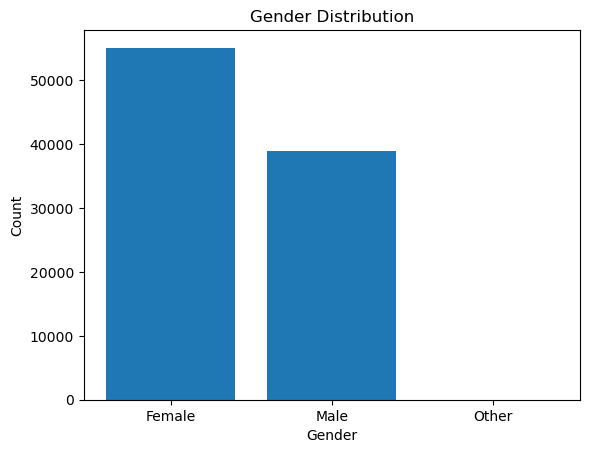

In [19]:
# Plotting gender
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
new_labels = ['Female', 'Male', 'Other']
plt.xticks(ticks=df['gender'].value_counts().index, labels=new_labels)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### From the graph, we can see that the majority of patients are Female followed by Male whereas there are few patients of third gender.

## 5. BMI

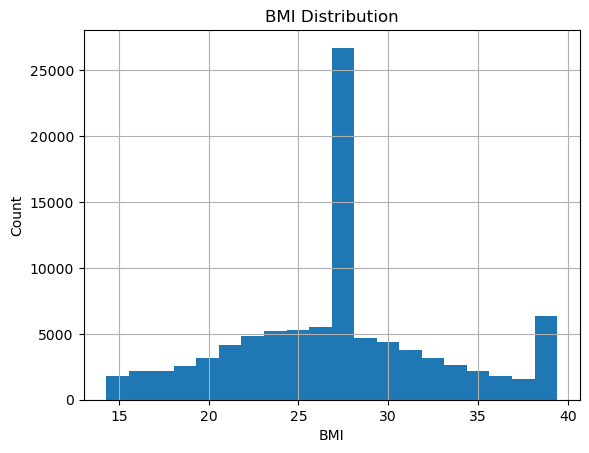

In [20]:
# Generating a histogram of the BMI values with 20 bins to visualize the distribution of BMI data.
df['bmi'].hist(bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#### a. More than 25000 patients have bmi between 27-28 i.e. more about half of patients in our dataset are overweight.
#### b. There are more than 5000 patients who fall in obese category with bmi more than 37.

## 6. Smoking History

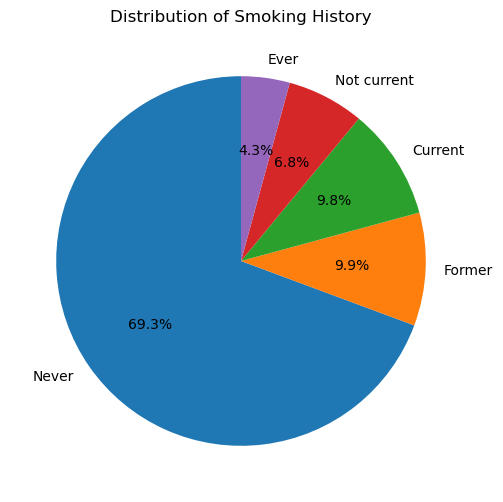

In [21]:
# Generating a pie chart showing the distribution of smoking history, with labels and percentages for each category.
value_count = df['smoking_history'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_count, labels=value_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Smoking History')
plt.show()

#### a. More than 50% of the patients have never smoked in life.
#### b. Around 10% are current smokers.

## BiVariate Analysis

## 7. Scatter plot between Glucose Level and BMI

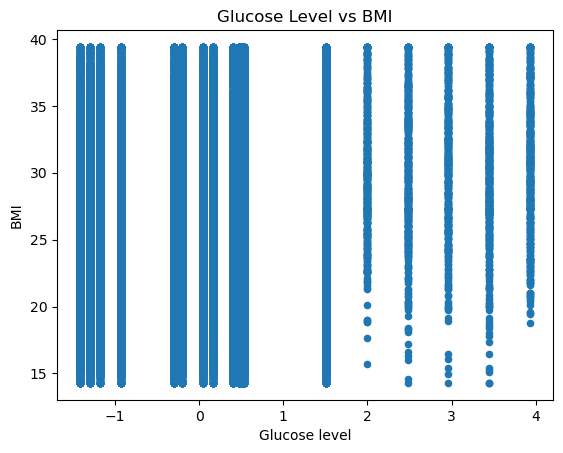

In [22]:
# Creating a scatter plot with blood glucose levels on the x-axis and BMI on the y-axis to visualize the relationship between these two variables.
df.plot.scatter(x='blood_glucose_level', y='bmi')
plt.title('Glucose Level vs BMI')
plt.xlabel('Glucose level')
plt.ylabel('BMI')
plt.show()

#### There is no direct relation between bmi values and glucose levels since we can find same glucose levels for different bmi values

## 8. Diabetes vs Age

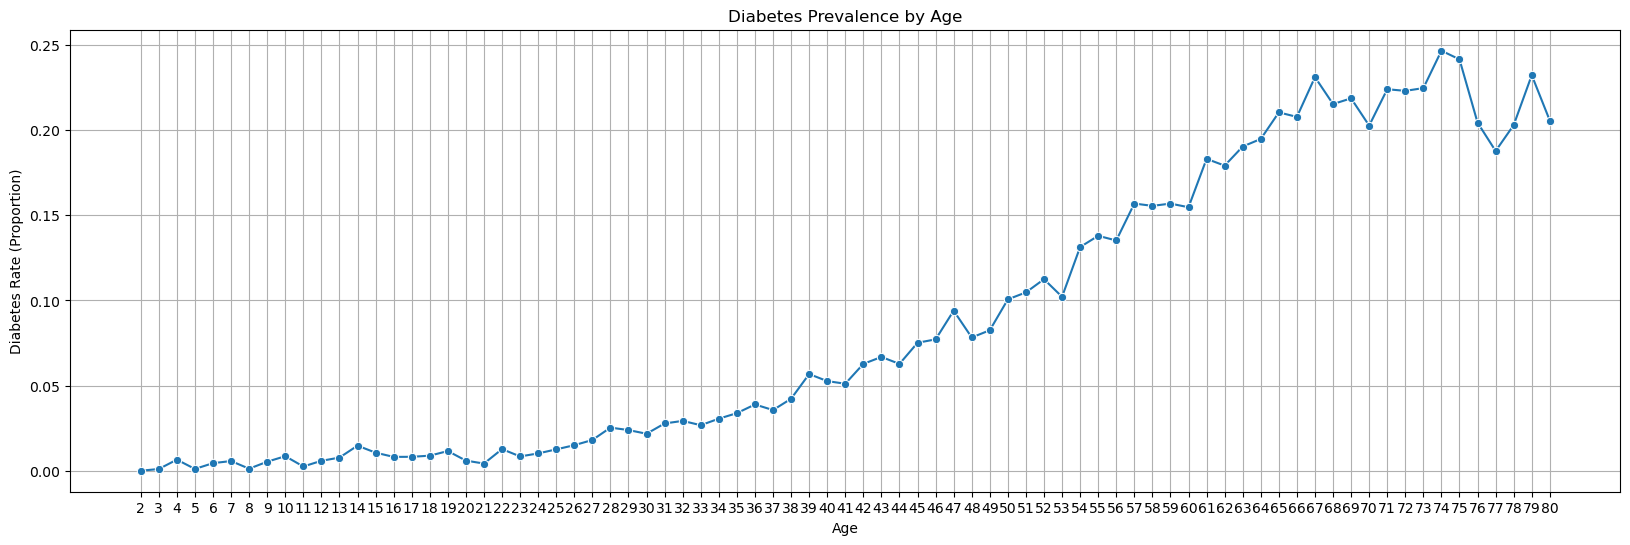

In [23]:
# Plotting a line graph showing diabetes prevalence by age, with markers at each data point for clarity.
age_diabetes = df.groupby('age')['diabetes'].mean().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=age_diabetes, x='age', y='diabetes', marker='o')
plt.title('Diabetes Prevalence by Age')
plt.xlabel('Age')
plt.ylabel('Diabetes Rate (Proportion)')
plt.xticks(age_diabetes['age'].unique()) 
plt.grid()
plt.show()

#### We can see from above line chart, diabetes rate increases with increase in age with slight fluctuations.

## 9. Age vs BMI category

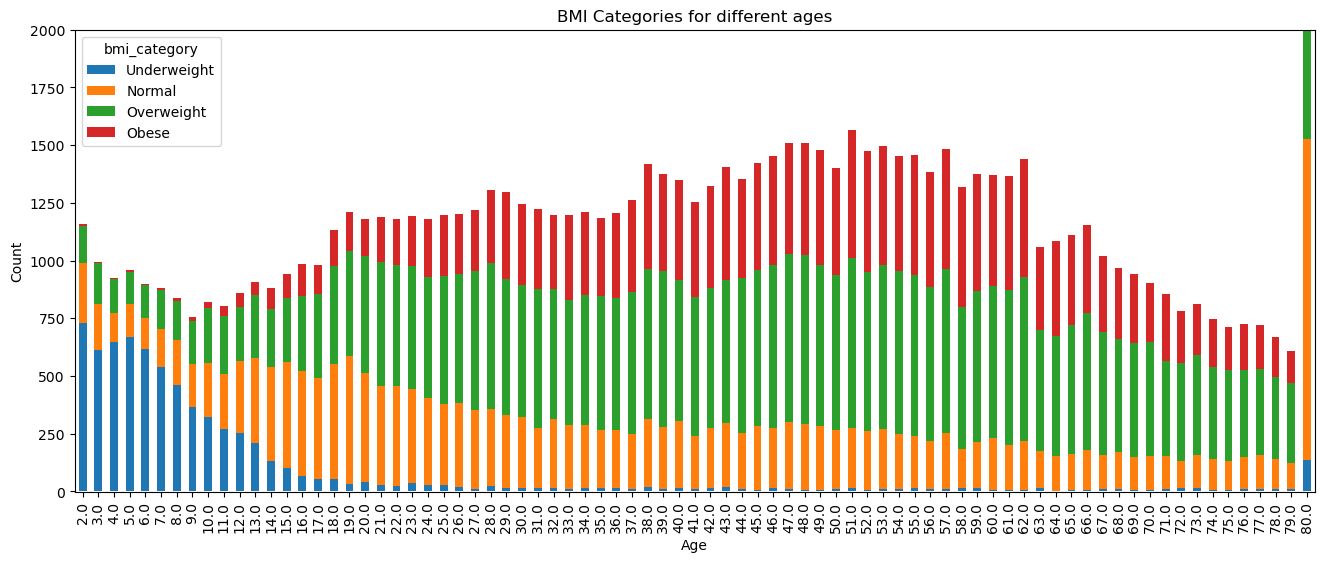

In [24]:
# Plotting a stacked bar chart of the cross-tabulation data to visualize BMI categories across different age groups.
ct = pd.crosstab(df['age'], df['bmi_category'])
ct.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.ylim(-1,2000)
plt.title('BMI Categories for different ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### a. From above graph, we can say that with age number of people with obesity increases.
#### b. Between ages 40 to 60 there's almost equal distribution in number of obese people and overweight people.
#### c. People under age 10 are most underweight.

## 10. Diabetes vs BMI

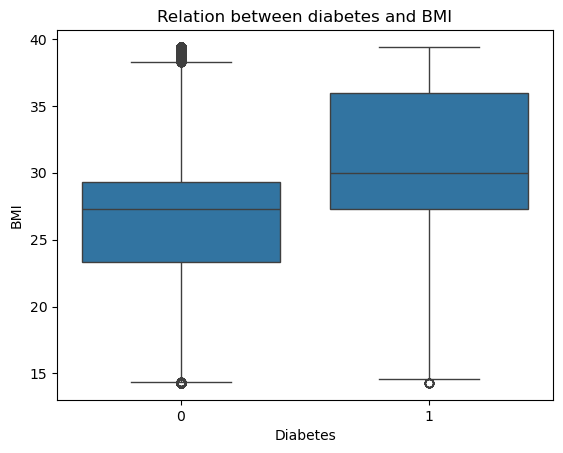

In [25]:
# Creating a box plot to visualize the relationship between diabetes status and BMI, displaying the distribution of BMI values for each diabetes group.
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Relation between diabetes and BMI')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

#### People with BMI between 27 to 37 are more prone to diabetes.